# The Spark Foundation - Internship
## Author - Shriti

### Technical Task1: Prediction Using Supervised Learning(Ml) In this task, we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a Simple Linear Regression Task as it shown two variables.

### Importing libraries

In [1]:
import pandas as pd #to modify dataframes
import numpy as np #for faster numerical calculations
import matplotlib.pyplot as plt #for plotting 
%matplotlib inline 

import seaborn as sns #also for plotting
from sklearn.model_selection import train_test_split #for splitting data into train and validation
from scipy import stats #for few statistical problems
from scipy.stats import norm, skew #to check or plot normal and skewed distributions
from sklearn import metrics# for check mean absolute error,mean squared error,r2 error

### step1: Reading the data from online source

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

### Understanding Data

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
#return a tuple representing the dimensionality of a dataframe
df.shape

(25, 2)

In [6]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

### Missing Values

In [7]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Statistical Summary

In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Correlation Between Variables   `

In [9]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Checking for Duplicates

In [10]:
df.duplicated().sum()

0

### Skewness and Kurtosis

In [11]:
df.skew()

Hours     0.190338
Scores    0.233965
dtype: float64

In [12]:
df.kurt()

Hours    -1.302343
Scores   -1.443833
dtype: float64

### step2: Data Visualization

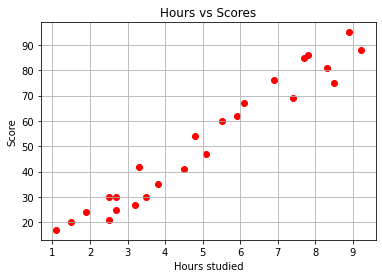

In [13]:
plt.scatter('Hours','Scores',data=df,color='red')
plt.title('Hours vs Scores')  
plt.xlabel('Hours studied')  
plt.ylabel('Score')  
plt.grid()

<AxesSubplot:>

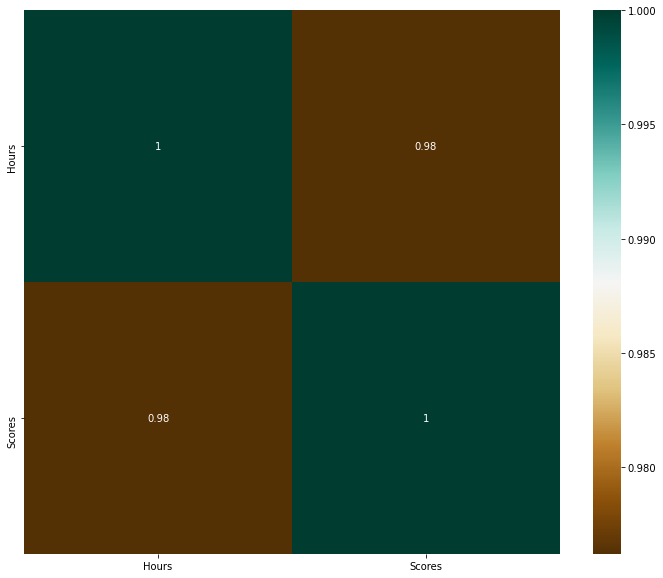

In [14]:
fig = plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), cmap='BrBG', annot = True)

### step3: Preparing the data

In [15]:
X=df.iloc[:,:-1].values

In [16]:
y=df.iloc[:,1].values

### Algorithm training

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [18]:
X_train.shape

(20, 1)

In [19]:
y_train.shape

(20,)

### Model fitting

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [22]:
m=lr.coef_

In [23]:
c=lr.intercept_

In [24]:
print('Coefficient:',m)
print('Intercept:',c)

Coefficient: [9.91065648]
Intercept: 2.018160041434683


### Plotting the line 

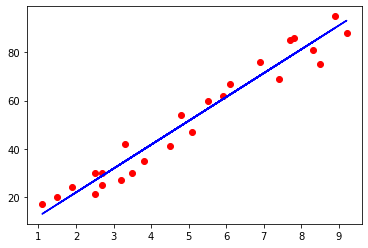

In [25]:
line=m*X+c
plt.scatter(X,y,color="red")
plt.plot(X,line,color= "blue")

### Making Predictions 

In [26]:
y_predict=lr.predict(X_test)

### comparing actual vs predicted 

In [27]:
data=pd.DataFrame({'Actual': y_test , 'Predicted': y_predict })

In [28]:
data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [29]:
print('training score:',lr.score(X_train,y_train))
print('testing score:',lr.score(X_test,y_test))

training score: 0.9515510725211552
testing score: 0.9454906892105356


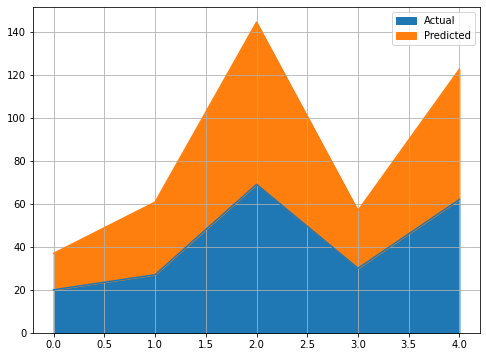

In [30]:
data.plot(kind='area',figsize=(8,6))
plt.grid()

In [31]:
hours = 9.25
hrs=np.array(hours)
hrs=hrs.reshape(-1,1)
print('No of Hours :',(hours))
print('Predicted Score :',lr.predict(hrs))

No of Hours : 9.25
Predicted Score : [93.69173249]


In [32]:
print('Predicted Score of  :',lr.predict(hrs))

Predicted Score of  : [93.69173249]


### Evaluating the model 

In [33]:
mae=metrics.mean_absolute_error(y_test,y_predict)
mse=metrics.mean_squared_error(y_test,y_predict)
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_predict))

In [34]:
print('Mean Absolute Error:',mae)
print('Mean Squared Error:',mse)
print('Root Mean Absolute Error:',rmse)

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Absolute Error: 4.6474476121003665


### Goodness of fit of a model 

In [35]:
print('r2 score:',metrics.r2_score(y_test,y_predict))

r2 score: 0.9454906892105356
